Netflix Movie Analysis

Topic: 

* Understanding trends in Netflix Movies over the years

Research question:

* What trends can be discovered in Netflix movie interests over the years?

Sub-questions:

1) What is the number of added movies released every year. How has this evolved?
2) What are the genres of these movies? Are they consistent over time?
3) What are the ratings of these movies? How has this evolved?
4) What is the length of these movies and how has it changed over time?
5) What about actors? Which year had the highest number of actors?


In [65]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
file1 = pd.read_csv("/Users/melanie/Ironhack/Week_5/Mid_bootcamp_project/data/raw/netflix.csv")
file1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [67]:
file4 = pd.read_csv("/Users/melanie/Ironhack/Week_5/Mid_bootcamp_project/data/raw/netflix.csv")
file4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [68]:
# Compare columns
file1.columns == file4.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [69]:
file1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [70]:
column_names1 = file1.columns
column_names1

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [71]:
# Get columnnames file1
column_names1 = file1.columns
netflix_movies = pd.DataFrame(columns=column_names1)
display(netflix_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description


In [72]:
file4.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [73]:
# Get columnnames file4
column_names4 = file4.columns
netflix_movies = pd.DataFrame(columns=column_names4)
display(netflix_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description


In [74]:
# Rename column "listed_in" into "genres"

cols = [] # list to store the new columns names
for i in range(len(file4.columns)):
    cols.append(file4.columns[i].lower())
file4.columns = cols

# alternative for using range(len(list)) in the for loop:
cols = []
for column in file4.columns:
    cols.append(column.lower())
file4.columns = cols

# renaming only some columns
file4 = file4.rename(columns={"listed_in":"genres"})
file4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [75]:
file4.shape

(7787, 12)

In [76]:
display(file1.columns)
display(file4.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [77]:
# Concatenate
netflix_movies = pd.concat([file1,file4], axis=0).reset_index(drop=True) # the argument ignore_index set to True resets the index, dropping the original ones
netflix_movies.head()

print("The shape of the new Pandas DataFrame is: ",netflix_movies.shape)
print()
print("The new dataframe is: ")
display(netflix_movies)

The shape of the new Pandas DataFrame is:  (15574, 12)

The new dataframe is: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
15569,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
15570,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
15571,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
15572,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [78]:
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'])

/var/folders/1t/xp0_q_jn0_xd2c4cl073hdrw0000gn/T/ipykernel_19262/3709264650.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'])


In [79]:
netflix_movies = netflix_movies[netflix_movies['type']=="Movie"]

In [80]:
netflix_movies.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
15565,s991,Movie,Blood Will Tell,"Miguel Cohan, Miguel Cohan","Oscar Martínez, Dolores Fonzi, Diego Velázquez...","Argentina, United States",2019-06-21,2019,TV-MA,113,"Dramas, Independent Movies, International Movies",Family patriarch Elías begins to unravel after...
15568,s994,Movie,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",United States,2019-10-01,2001,R,123,Dramas,Cocaine smuggler George rises from poverty to ...
15571,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
15572,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...
15573,s999,Movie,Blue Jay,Alex Lehmann,"Sarah Paulson, Mark Duplass, Clu Gulager",United States,2016-12-06,2016,TV-MA,81,"Dramas, Independent Movies, Romantic Movies",Two former high school sweethearts unexpectedl...


# Checking for duplicates

In [81]:
netflix_movies = netflix_movies.drop_duplicates(subset=["type","title","director",
                                                       "release_year","rating"], keep='first')

In [82]:
print("The shape of the new Pandas DataFrame is: ",netflix_movies.shape)
print()
print("The new dataframe is: ")
display(netflix_movies)

The shape of the new Pandas DataFrame is:  (5377, 12)

The new dataframe is: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
5,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
6,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s991,Movie,Blood Will Tell,"Miguel Cohan, Miguel Cohan","Oscar Martínez, Dolores Fonzi, Diego Velázquez...","Argentina, United States",2019-06-21,2019,TV-MA,113,"Dramas, Independent Movies, International Movies",Family patriarch Elías begins to unravel after...
7781,s994,Movie,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",United States,2019-10-01,2001,R,123,Dramas,Cocaine smuggler George rises from poverty to ...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [83]:
netflix_movies.shape

(5377, 12)

In [84]:
# checking if the total number of rows is correct:
(file1.shape[0] + file4.shape[0]) == netflix_movies.shape[0] 

False

# Checking for missing values

In [85]:
# checking if there are empty rows:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
rating            5
duration          0
genres            0
description       0
dtype: int64

Why did I delete these columns?
* I deleted the missing values because it would take to much time to replace them. This way I could continue the project to the next step and I at least would have clean data.

In [86]:
netflix_movies.dropna(inplace=True)
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
5,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
6,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s991,Movie,Blood Will Tell,"Miguel Cohan, Miguel Cohan","Oscar Martínez, Dolores Fonzi, Diego Velázquez...","Argentina, United States",2019-06-21,2019,TV-MA,113,"Dramas, Independent Movies, International Movies",Family patriarch Elías begins to unravel after...
7781,s994,Movie,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",United States,2019-10-01,2001,R,123,Dramas,Cocaine smuggler George rises from poverty to ...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [87]:
# check missing values:
netflix_movies.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

In [88]:
netflix_movies = netflix_movies.reset_index(drop=True)

In [89]:
# checking amount of rows:
netflix_movies.shape[0]
len(netflix_movies)

4673

In [90]:
# checking if there are duplicates:
netflix_movies.duplicated().sum()

0

In [91]:
# Replacing missing values in categorical columns:

    #display(netflix_movies['title'].unique())
    #display(netflix_movies['title'].value_counts())

display(netflix_movies['title'].unique())

array(['1920', '3 Heroines', 'Blue Mountain State: The Rise of Thadland',
       ..., 'Blue Is the Warmest Color', 'Blue Jasmine', 'Blue Jay'],
      dtype=object)

In [92]:
display(netflix_movies['title'].value_counts()) 

title
1920                               1
APEX: The Story of the Hypercar    1
Skin Trade                         1
Skin                               1
Sisterakas                         1
                                  ..
Karzzzz                            1
Kartini: Princess of Java          1
Karthik Calling Karthik            1
Aftermath                          1
Blue Jay                           1
Name: count, Length: 4673, dtype: int64

In [93]:
["type","title","director","country","date_added","release_year","rating","genres"]

['type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'genres']

In [94]:
netflix_movies[netflix_movies['title']=="Good Luck Chuck"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
977,s2485,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada",2019-10-01,2007,UR,99,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."


In [95]:
# Display unique values of column "type" Movie and TV Show
 
#netflix_movies[["type","title"]].groupby("type").sum().head() # using groupby
#netflix_movies.pivot_table(index="type",values="title",aggfunc=sum).head() # using pivot table
#netflix_movies.pivot_table(index=["show_id","type"],values="title",aggfunc=sum) # long format table
netflix_movies.pivot_table(index="title",columns="type",values="show_id",aggfunc=sum) # wide format table

/var/folders/1t/xp0_q_jn0_xd2c4cl073hdrw0000gn/T/ipykernel_19262/2002503379.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  netflix_movies.pivot_table(index="title",columns="type",values="show_id",aggfunc=sum) # wide format table


type,Movie
title,
#Alive,s28
#AnneFrank - Parallel Stories,s29
#FriendButMarried,s32
#FriendButMarried 2,s33
#Roxy,s35
...,...
​Goli Soda 2,s22
​Maj Rati ​​Keteki,s23
​Mayurakshi,s24


In [96]:
# drop all rows that contain 'TV Shows'
# How to Remove Rows with Specific Values in Pandas DataFrame
# Using the drop Function

nm = netflix_movies
nm = nm.drop(nm[nm['type'] == 'TV Shows'].index)

# print the resulting DataFrame
print(nm)

     show_id   type                                      title  \
0        s10  Movie                                       1920   
1       s100  Movie                                 3 Heroines   
2      s1000  Movie  Blue Mountain State: The Rise of Thadland   
3      s1002  Movie                                  Blue Ruin   
4      s1003  Movie                                Blue Streak   
...      ...    ...                                        ...   
4668    s991  Movie                            Blood Will Tell   
4669    s994  Movie                                       Blow   
4670    s997  Movie                  Blue Is the Warmest Color   
4671    s998  Movie                               Blue Jasmine   
4672    s999  Movie                                   Blue Jay   

                        director  \
0                   Vikram Bhatt   
1                 Iman Brotoseno   
2                   Lev L. Spiro   
3                Jeremy Saulnier   
4                   Les May

In [97]:
netflix_movies = netflix_movies.reset_index(drop=True)
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
1,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
2,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
3,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
4,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...
...,...,...,...,...,...,...,...,...,...,...,...,...
4668,s991,Movie,Blood Will Tell,"Miguel Cohan, Miguel Cohan","Oscar Martínez, Dolores Fonzi, Diego Velázquez...","Argentina, United States",2019-06-21,2019,TV-MA,113,"Dramas, Independent Movies, International Movies",Family patriarch Elías begins to unravel after...
4669,s994,Movie,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",United States,2019-10-01,2001,R,123,Dramas,Cocaine smuggler George rises from poverty to ...
4670,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
4671,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [98]:
    #display(netflix_movies['title'].unique())
    #display(netflix_movies['title'].value_counts())

display(netflix_movies['type'].unique())

array(['Movie'], dtype=object)

In [99]:
display(netflix_movies['type'].value_counts())

type
Movie    4673
Name: count, dtype: int64

In [100]:
display(netflix_movies['title'].unique())

array(['1920', '3 Heroines', 'Blue Mountain State: The Rise of Thadland',
       ..., 'Blue Is the Warmest Color', 'Blue Jasmine', 'Blue Jay'],
      dtype=object)

In [101]:
display(netflix_movies['show_id'].unique())

array(['s10', 's100', 's1000', ..., 's997', 's998', 's999'], dtype=object)

In [102]:
display(netflix_movies['show_id'].value_counts())

show_id
s10      1
s562     1
s5648    1
s5646    1
s5642    1
        ..
s3312    1
s3311    1
s3310    1
s331     1
s999     1
Name: count, Length: 4673, dtype: int64

In [103]:
display(netflix_movies['title'].value_counts())

title
1920                               1
APEX: The Story of the Hypercar    1
Skin Trade                         1
Skin                               1
Sisterakas                         1
                                  ..
Karzzzz                            1
Kartini: Princess of Java          1
Karthik Calling Karthik            1
Aftermath                          1
Blue Jay                           1
Name: count, Length: 4673, dtype: int64

In [104]:
#netflix_movies
display(netflix_movies)


# Creating a DataFrame object
#netflix_movies = pd.DataFrame(netflix_movies,
                  #columns = ['show_id', 'title'])
display(netflix_movies = pd.DataFrame(netflix_movies,
                  columns = ['show_id', 'title']))

# Selecting duplicate rows based
# on 'show_id' column
duplicate = netflix_movies[netflix_movies.duplicated('show_id')]

print("Duplicate Rows based on 'show_id':")

# Print the resultant Dataframe
duplicate

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
1,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
2,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
3,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
4,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...
...,...,...,...,...,...,...,...,...,...,...,...,...
4668,s991,Movie,Blood Will Tell,"Miguel Cohan, Miguel Cohan","Oscar Martínez, Dolores Fonzi, Diego Velázquez...","Argentina, United States",2019-06-21,2019,TV-MA,113,"Dramas, Independent Movies, International Movies",Family patriarch Elías begins to unravel after...
4669,s994,Movie,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",United States,2019-10-01,2001,R,123,Dramas,Cocaine smuggler George rises from poverty to ...
4670,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
4671,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


Duplicate Rows based on 'show_id':


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description


In [105]:
netflix_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [106]:
# Apply a filter to get only Movies:
 
#display(netflix_movies['type'])
netflix_movies['type']

0       Movie
1       Movie
2       Movie
3       Movie
4       Movie
        ...  
4668    Movie
4669    Movie
4670    Movie
4671    Movie
4672    Movie
Name: type, Length: 4673, dtype: object

In [107]:
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
1,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
2,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
3,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
4,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...
...,...,...,...,...,...,...,...,...,...,...,...,...
4668,s991,Movie,Blood Will Tell,"Miguel Cohan, Miguel Cohan","Oscar Martínez, Dolores Fonzi, Diego Velázquez...","Argentina, United States",2019-06-21,2019,TV-MA,113,"Dramas, Independent Movies, International Movies",Family patriarch Elías begins to unravel after...
4669,s994,Movie,Blow,Ted Demme,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",United States,2019-10-01,2001,R,123,Dramas,Cocaine smuggler George rises from poverty to ...
4670,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
4671,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [108]:
# Saving DataFrames into csv files 

#netflix_movies.to_csv('../data/cleaned/netflix_movies_clean1.csv')
netflix_movies.to_csv('../../data/cleaned/netflix_movies_cleaned1.csv')

In [109]:
# Saving DataFrames into xlsx files 

#netflix_movies.to_excel('../data/cleaned/netflix_movies_clean1.xlsx')
netflix_movies.to_excel('../../data/cleaned/netflix_movies_cleaned1.xlsx')

1) What is the number of Netflix movies added every year? How has this evolved? 

In [110]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
1,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
2,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
3,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
4,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...


In [111]:
netflix_movies['year_added'] = netflix_movies['date_added'].dt.year
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added
0,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017
1,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2019
2,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,2016
3,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",2019-02-25,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...,2019
4,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...,2021


In [112]:
netflix_added_movies_by_year = netflix_movies.groupby(['year_added']).agg({"title": 'nunique'}).reset_index()
netflix_added_movies_by_year.columns = ["year_added","number_of_movies"]
netflix_added_movies_by_year

,year_added,number_of_movies
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,14
7,2015,47
8,2016,200
9,2017,727


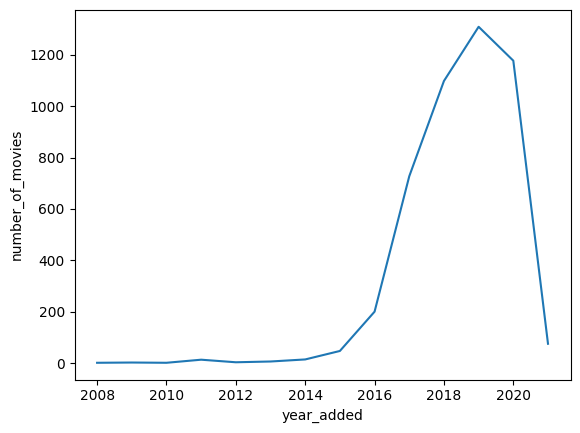

In [113]:
sns.lineplot(data=netflix_added_movies_by_year, x="year_added", y="number_of_movies");

2) What are the genres of these movies? Are they consistent over time?

In [114]:
netflix_added_movies_by_year_and_genres = netflix_movies.groupby(['year_added','genres']).agg({"title": 'nunique'}).reset_index()
netflix_added_movies_by_year_and_genres.rename(columns={"title":"number_of_movies"},inplace=True)
netflix_added_movies_by_year_and_genres

,year_added,genres,number_of_movies
0,2008,"Dramas, Independent Movies, Thrillers",1
1,2009,"Dramas, International Movies",1
2,2009,Horror Movies,1
3,2010,"Cult Movies, Horror Movies",1
4,2011,"Children & Family Movies, Dramas, Faith & Spir...",1
...,...,...,...
738,2021,"Dramas, Thrillers",3
739,2021,Horror Movies,1
740,2021,"Horror Movies, Thrillers",2
741,2021,Stand-Up Comedy,1


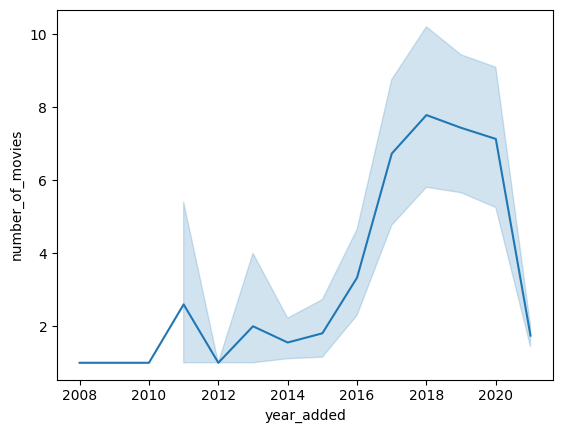

In [115]:
sns.lineplot(data=netflix_added_movies_by_year_and_genres, x="year_added", y="number_of_movies");

3) What are the ratings of these movies? How has this evolved?

In [116]:
netflix_added_movies_by_year_and_rating = netflix_movies.groupby(['year_added','rating']).agg({"title": 'nunique'}).reset_index()
netflix_added_movies_by_year_and_rating.rename(columns={"title":"number_of_movies"},inplace=True)
netflix_added_movies_by_year_and_rating

,year_added,rating,number_of_movies
0,2008,TV-MA,1
1,2009,TV-MA,2
2,2010,NR,1
3,2011,TV-14,5
4,2011,TV-MA,3
...,...,...,...
93,2021,TV-14,13
94,2021,TV-G,1
95,2021,TV-MA,7
96,2021,TV-Y,1


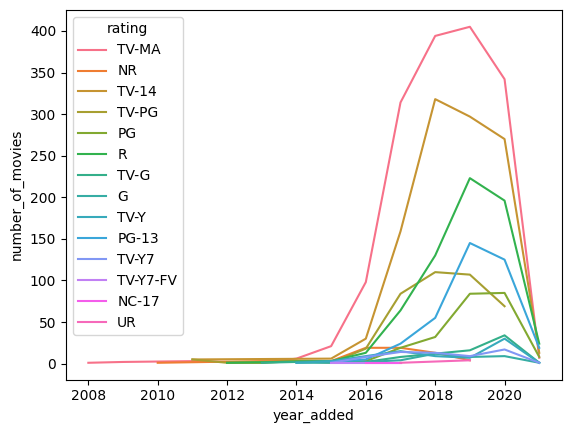

In [117]:
sns.lineplot(data=netflix_added_movies_by_year_and_rating, x="year_added", y="number_of_movies", hue="rating");

4) What is the length of these movies and how has it changed over time?

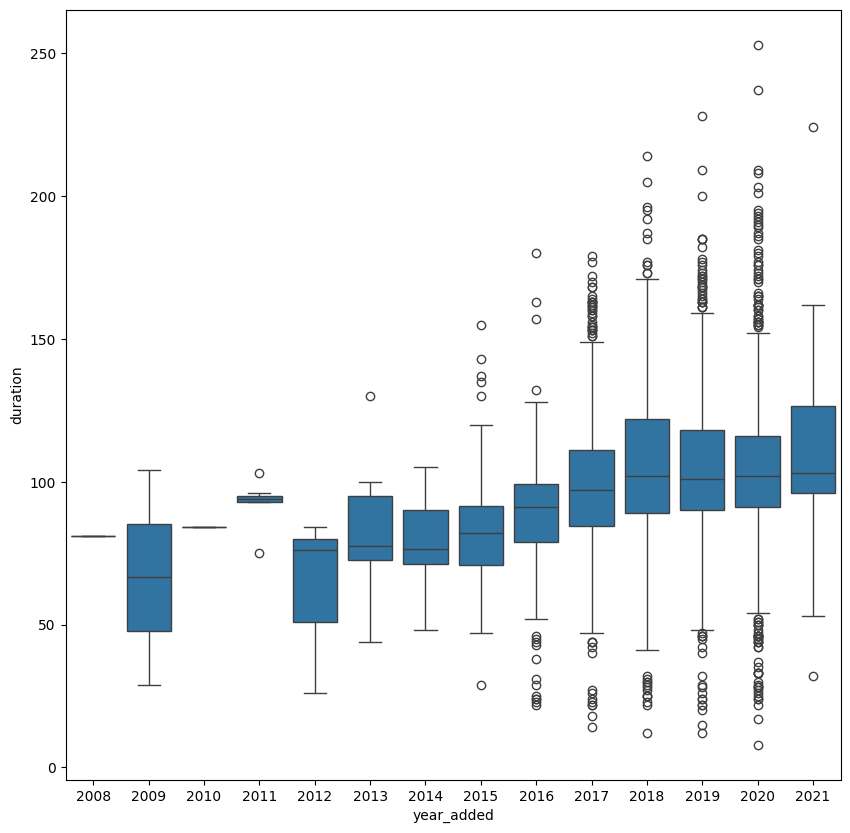

In [118]:
fig, ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=netflix_movies, y="duration", x="year_added");
plt.show()

5) What about directors? Which year had the highest number of directors?

In [119]:
netflix_added_movies_by_year_and_director = netflix_movies.groupby(['year_added','director']).agg({"title": 'nunique'}).reset_index()
netflix_added_movies_by_year_and_director.rename(columns={"title":"number_of_movies"},inplace=True)
netflix_added_movies_by_year_and_director

,year_added,director,number_of_movies
0,2008,Sorin Dan Mihalcescu,1
1,2009,Joe Dante,1
2,2009,Ole Bornedal,1
3,2010,Jim Monaco,1
4,2011,Arthur Allan Seidelman,1
...,...,...,...
4035,2021,Seth Gordon,1
4036,2021,Sohail Khan,1
4037,2021,Steven Knight,1
4038,2021,Steven Spielberg,2


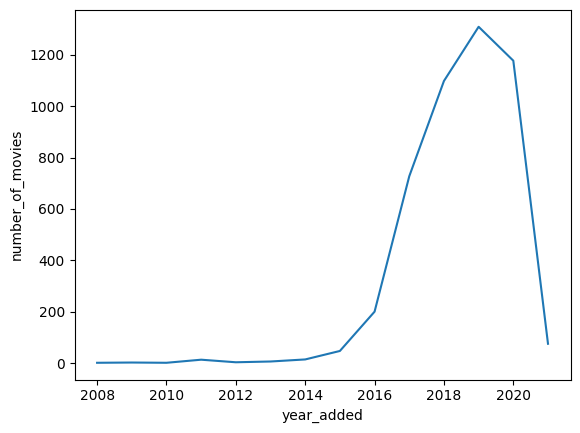

In [120]:
#sns.lineplot(data=netflix_added_movies_by_year_and_director, x="year_added", y="number_of_movies");
sns.lineplot(data=netflix_added_movies_by_year, x="year_added", y="number_of_movies");